#**Experiment 7**

Name: Jeenal Mehta

UID: 2019140039

Course: Data Analytics

#Exercise 1:

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
df1Lst = [
          [1, 1, 0, 1, 0, 1],
          [1, 1, 1, 1, 1, 0],
          [1, 1, 1, 0, 1, 0],
          [1, 1, 0, 1, 0, 0],
]

df1 = pd.DataFrame(df1Lst, columns=['A', 'B', 'C', 'D', 'E', 'K'])
df1

,A,B,C,D,E,K
0,1,1,0,1,0,1
1,1,1,1,1,1,0
2,1,1,1,0,1,0
3,1,1,0,1,0,0


In [3]:
frq_items = apriori(df1, min_support = 0.6, use_colnames = True)
print(frq_items)
rules = association_rules(frq_items, metric ="confidence", min_threshold = 0.8)
print(rules)

   support   itemsets
0     1.00        (A)
1     1.00        (B)
2     0.75        (D)
3     1.00     (B, A)
4     0.75     (D, A)
5     0.75     (B, D)
6     0.75  (B, D, A)
  antecedents consequents  antecedent support  consequent support  support  \
0         (B)         (A)                1.00                 1.0     1.00   
1         (A)         (B)                1.00                 1.0     1.00   
2         (D)         (A)                0.75                 1.0     0.75   
3         (D)         (B)                0.75                 1.0     0.75   
4      (B, D)         (A)                0.75                 1.0     0.75   
5      (D, A)         (B)                0.75                 1.0     0.75   
6         (D)      (B, A)                0.75                 1.0     0.75   

   confidence  lift  leverage  conviction  
0         1.0   1.0       0.0         inf  
1         1.0   1.0       0.0         inf  
2         1.0   1.0       0.0         inf  
3         1.0   1.0    

##Conclusion for exercise 1:

Association rules found were

{A} => {B}

{B} => {A}

{D} => {A}

{D} => {B}

{D, B} => {A}

{D, A} => {B}

{D} => {B, A}

#Exercise 2:

Dataset used from Kaggle: [https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset](https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset)

The dataset has 38765 rows of purchase orders from the grocery stores.




The Apriori Algorithm is one of the most popular algorithms used in association rule learning over relational databases. It identifies the items in a data set and further extends them to larger and larger item sets.

Steps in the Apriori Algorithm:

1.   The algorithm starts by generating an itemset through the Join Step, that is to generate (K+1) itemset from K-itemsets. For example, the algorithm generates Cookie, Chocolate and Cake in the first iteration.
2.   Immediately after that, the algorithm proceeds with the Prune Step, that is to remove any candidate item set that does not meet the minimum support requirement. For example, the algorithm will remove Cake if Support(Cake) is below the predetermined minimum Support.

It iterates both of the steps until there are no possible further extensions left.

##Import and read the data

First of all, let’s import some necessary modules and read the datasets that we have downloaded from Kaggle.

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

basket = pd.read_csv("groceries.csv")
display(basket.head())

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


##Grouping into transactions
The data set records individual item purchases in a row. We will have to group these purchases into baskets of items.
After that, we will use TransactionEncoder to encode the transactions into a format that is suitable for the Apriori function.

In [5]:
basket.itemDescription = basket.itemDescription.transform(lambda x: [x])
basket = basket.groupby(['Member_number','Date']).sum()['itemDescription'].reset_index(drop=True)

encoder = TransactionEncoder()
transactions = pd.DataFrame(encoder.fit(basket).transform(basket), columns=encoder.columns_)
display(transactions.head())

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The data frame records each row as a transaction, and the items that were purchased in the transaction will be recorded as "True".

##Apriori and Association Rules
The Apriori Algorithm will be used to generate frequent item sets. We will be specifying the minimum support to be 6 out of total transactions. The association rules are generated and we filter for Lift value > 1.5.

In [6]:
frequent_itemsets = apriori(transactions, min_support= 6/len(basket), use_colnames=True, max_len = 2)
rules = association_rules(frequent_itemsets, metric="lift",  min_threshold = 1.5)
display(rules.head())
print("Rules identified: ", len(rules))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(UHT-milk),(butter milk),0.021386,0.017577,0.000601,0.028125,1.600131,0.000226,1.010854
1,(butter milk),(UHT-milk),0.017577,0.021386,0.000601,0.034221,1.600131,0.000226,1.013289
2,(UHT-milk),(cream cheese ),0.021386,0.023658,0.000869,0.040625,1.717152,0.000363,1.017685
3,(cream cheese ),(UHT-milk),0.023658,0.021386,0.000869,0.036723,1.717152,0.000363,1.015922
4,(soda),(artif. sweetener),0.097106,0.001938,0.000468,0.004818,2.485725,0.000280,1.002893


Rules identified:  190


##Visualizations
To visualize our association rules, we can plot them in a 3D scatter plot. Rules that are closer to top right are the rules that can be the most meaningful to be further dived in.

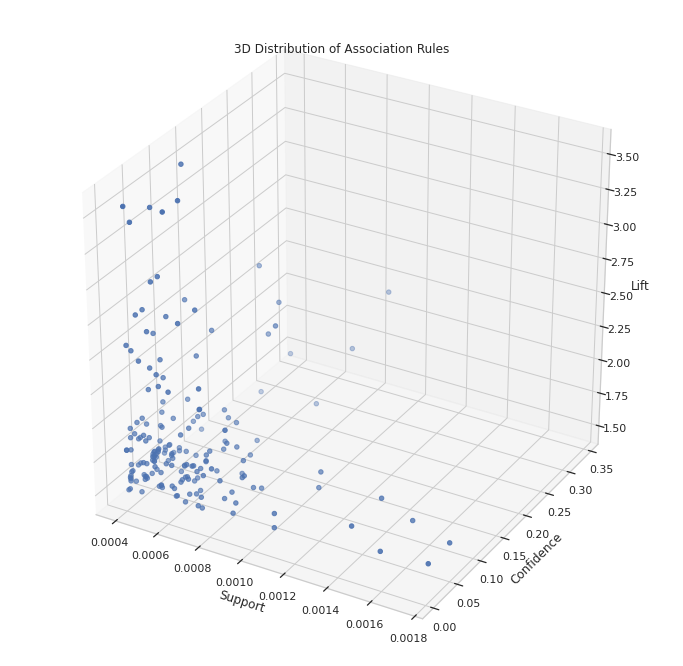

In [7]:
sns.set(style = "whitegrid")
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection = '3d')


x = rules['support']
y = rules['confidence']
z = rules['lift']

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")

ax.scatter(x, y, z)
ax.set_title("3D Distribution of Association Rules")

plt.show()

Another type of visualizations to look at the relationship between the products is via Network Graph. Let’s define a function to draw a network graph which can specify how many rules we want to show.

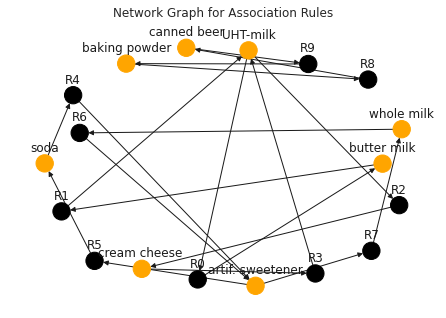

In [9]:
def draw_network(rules, rules_to_show):
  # Directional Graph from NetworkX
  network = nx.DiGraph()
  
  # Loop through number of rules to show
  for i in range(rules_to_show):
    
    # Add a Rule Node
    network.add_nodes_from(["R"+str(i)])
    for antecedents in rules.iloc[i]['antecedents']: 
        # Add antecedent node and link to rule
        network.add_nodes_from([antecedents])
        network.add_edge(antecedents, "R"+str(i),  weight = 2)
      
    for consequents in rules.iloc[i]['consequents']:
        # Add consequent node and link to rule
        network.add_nodes_from([consequents])
        network.add_edge("R"+str(i), consequents,  weight = 2)

  color_map=[]  
  
  # For every node, if it's a rule, colour as Black, otherwise Orange
  for node in network:
       if re.compile("^[R]\d+$").fullmatch(node) != None:
            color_map.append('black')
       else:
            color_map.append('orange')
  
  # Position nodes using spring layout
  pos = nx.spring_layout(network, k=16, scale=1)
  # Draw the network graph
  nx.draw(network, pos, node_color = color_map, font_size=8)            
  
  # Shift the text position upwards
  for p in pos:  
      pos[p][1] += 0.12

  nx.draw_networkx_labels(network, pos)
  plt.title("Network Graph for Association Rules")
  plt.show()

draw_network(rules, 10)

##Let's assume
The grocery has bought up too much Whole Milk and is now worrying that the stocks will expire if they cannot be sold out in time. To make matters worse, the profit margin of Whole Milk is so low that they cannot afford to have a promotional discount without killing too much of their profits.




One approach that can be proposed is to find out which products drive the sales of Whole Milk and offer discounts on those products instead.

In [10]:
milk_rules = rules[rules['consequents'].astype(str).str.contains('whole milk')]
milk_rules = milk_rules.sort_values(by=['lift'],ascending = [False]).reset_index(drop = True)

display(milk_rules.head())

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(brandy),(whole milk),0.002540,0.157923,0.000869,0.342105,2.166281,0.000468,1.279957
1,(softener),(whole milk),0.002740,0.157923,0.000802,0.292683,1.853328,0.000369,1.190523
2,(canned fruit),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908
3,(syrup),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908
4,(artif. sweetener),(whole milk),0.001938,0.157923,0.000535,0.275862,1.746815,0.000229,1.162868


For instance, we can apply a promotional discount on Brandy, Softener, Canned Fruit, Syrup and Artificial Sweetener. Some of the associations may seem counter-intuitive, but the rules state that these products do drive the sales of Whole Milk.

#Conclusion
By implementing the Apriori Algorithm and analyzing the association measures, businesses can derive dozens of data-driven strategies to boost their revenue and profits. These association rules are critical in data mining for analyzing consumer’s purchasing behavior. Some of the most important strategies of a retailer, such as Customer analytics, Market Basket analysis and Product Clustering are able to derive valuable insights through association rule mining.
